In [88]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3 
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [89]:
df_02 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200502.txt')
df_09 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200509.txt')
df_16 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200516.txt')
df_23 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200523.txt')
df_30 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200530.txt')
frames = [ df_02, df_09, df_16, df_23, df_30]
df_May_2020 = pd.concat(frames)


In [90]:
df_May_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036986 entries, 0 to 210413
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1036986 non-null  object
 1   UNIT                                                                  1036986 non-null  object
 2   SCP                                                                   1036986 non-null  object
 3   STATION                                                               1036986 non-null  object
 4   LINENAME                                                              1036986 non-null  object
 5   DIVISION                                                              1036986 non-null  object
 6   DATE                                                                  1036986 non-n

In [91]:
df_May_2020.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,00:00:00,REGULAR,7415454,2518022
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,04:00:00,REGULAR,7415454,2518022
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,08:00:00,REGULAR,7415459,2518033
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,12:00:00,REGULAR,7415468,2518044
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,16:00:00,REGULAR,7415480,2518056


In [92]:
df_May_2020.count()

C/A                                                                     1036986
UNIT                                                                    1036986
SCP                                                                     1036986
STATION                                                                 1036986
LINENAME                                                                1036986
DIVISION                                                                1036986
DATE                                                                    1036986
TIME                                                                    1036986
DESC                                                                    1036986
ENTRIES                                                                 1036986
EXITS                                                                   1036986
dtype: int64

In [93]:
# Remove records where DESC (audit event) != REGULAR
df_May_2020 = df_May_2020[df_May_2020.DESC == 'REGULAR']

In [94]:
df_May_2020.count()

C/A                                                                     1033018
UNIT                                                                    1033018
SCP                                                                     1033018
STATION                                                                 1033018
LINENAME                                                                1033018
DIVISION                                                                1033018
DATE                                                                    1033018
TIME                                                                    1033018
DESC                                                                    1033018
ENTRIES                                                                 1033018
EXITS                                                                   1033018
dtype: int64

In [95]:
df_May_2020.DESC.value_counts()

REGULAR    1033018
Name: DESC, dtype: int64

In [96]:
# Are there missing data ?
df_May_2020.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [97]:
Station_names = pd.read_excel('D:\Data Scients Kursu\Projeler\MTA\Remote-Booth-Station-name.xls')

In [98]:
Station_names.head()

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [99]:
## Select only Station and Booth Column
Station_names = Station_names[['Booth','Station']]

In [100]:
Station_names.rename(columns = {'Booth':'C/A'}, inplace = True)
Station_names.rename(columns = {'Station':'station-name'}, inplace = True)

In [101]:
df_May_2020 = pd.merge(df_May_2020, Station_names, on = ['C/A'])
df_May_2020.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,station-name
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,00:00:00,REGULAR,7415454,2518022,LEXINGTON AVE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,04:00:00,REGULAR,7415454,2518022,LEXINGTON AVE
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,08:00:00,REGULAR,7415459,2518033,LEXINGTON AVE
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,12:00:00,REGULAR,7415468,2518044,LEXINGTON AVE
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,16:00:00,REGULAR,7415480,2518056,LEXINGTON AVE


In [15]:
df_May_2020.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,station-name
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,00:00:00,REGULAR,7415454,2518022,LEXINGTON AVE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,04:00:00,REGULAR,7415454,2518022,LEXINGTON AVE
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,08:00:00,REGULAR,7415459,2518033,LEXINGTON AVE
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,12:00:00,REGULAR,7415468,2518044,LEXINGTON AVE
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,16:00:00,REGULAR,7415480,2518056,LEXINGTON AVE


In [16]:
df_May_2020['turnstile'] = df_May_2020['C/A'] + '-' + df_May_2020['UNIT'] + '-' + df_May_2020['SCP']
df_May_2020['datetime'] = pd.to_datetime(df_May_2020.DATE + ' ' + df_May_2020.TIME, format='%m/%d/%Y  %H:%M:%S')
df_May_2020 = df_May_2020[(df_May_2020.datetime >= '05-01-20 11:00:00') & 
          (df_May_2020.datetime <'05-31-20 17:59:00')]

In [17]:
df_May_2020.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,station-name,turnstile,datetime
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2020,12:00:00,REGULAR,7416130,2518439,LEXINGTON AVE,A002-R051-02-00-00,2020-05-01 12:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2020,16:00:00,REGULAR,7416169,2518457,LEXINGTON AVE,A002-R051-02-00-00,2020-05-01 16:00:00
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2020,20:00:00,REGULAR,7416219,2518464,LEXINGTON AVE,A002-R051-02-00-00,2020-05-01 20:00:00
81,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/01/2020,12:00:00,REGULAR,6591664,1484312,LEXINGTON AVE,A002-R051-02-00-01,2020-05-01 12:00:00
82,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/01/2020,16:00:00,REGULAR,6591687,1484323,LEXINGTON AVE,A002-R051-02-00-01,2020-05-01 16:00:00


In [18]:
df_May_2020.rename(columns = {'EXITS                                                               ':'EXITS'}, inplace = True)
df_May_2020.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'station-name', 'turnstile', 'datetime'],
      dtype='object')

In [19]:
df_May_2020_sorted = df_May_2020.sort_values(['turnstile', 'datetime'])
df_May_2020_sorted = df_May_2020_sorted.reset_index(drop = True)

turnstile_grouped = df_May_2020_sorted.groupby(['turnstile'])

df_May_2020_sorted['entries_diff'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff)
df_May_2020_sorted['exits_diff'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)

df_May_2020_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,station-name,turnstile,datetime,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2020,12:00:00,REGULAR,7416130,2518439,LEXINGTON AVE,A002-R051-02-00-00,2020-05-01 12:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2020,16:00:00,REGULAR,7416169,2518457,LEXINGTON AVE,A002-R051-02-00-00,2020-05-01 16:00:00,39.0,18.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2020,20:00:00,REGULAR,7416219,2518464,LEXINGTON AVE,A002-R051-02-00-00,2020-05-01 20:00:00,50.0,7.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/02/2020,00:00:00,REGULAR,7416239,2518469,LEXINGTON AVE,A002-R051-02-00-00,2020-05-02 00:00:00,20.0,5.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/02/2020,04:00:00,REGULAR,7416240,2518473,LEXINGTON AVE,A002-R051-02-00-00,2020-05-02 04:00:00,1.0,4.0


In [20]:
# check distribution of entries_diff and exits_diff
print('Descriptions of entries_diff:')
print(df_May_2020_sorted['entries_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(df_May_2020_sorted['exits_diff'].describe())

Descriptions of entries_diff:
count    7.912430e+05
mean     1.948315e+03
std      1.829948e+06
min     -1.197937e+08
25%      0.000000e+00
50%      6.000000e+00
75%      2.300000e+01
max      1.621027e+09
Name: entries_diff, dtype: float64

Descriptions of exits_diff:
count    7.912430e+05
mean     2.034643e+03
std      1.822603e+06
min     -8.424145e+06
25%      1.000000e+00
50%      8.000000e+00
75%      2.300000e+01
max      1.621075e+09
Name: exits_diff, dtype: float64


In [21]:
print('Number of negative entries_diff: %d' %len(df_May_2020_sorted['entries_diff'][df_May_2020_sorted['entries_diff'] < 0]))
print('Number of negative exits_diff: %d' %len(df_May_2020_sorted['exits_diff'][df_May_2020_sorted['exits_diff'] < 0]))
print('Number of unqiue turnstiles: %d' %len(df_May_2020_sorted['turnstile'].unique()))
print('Number of NaN rows: %d' %len(df_May_2020_sorted[df_May_2020_sorted['entries_diff'].isnull()]))

Number of negative entries_diff: 6361
Number of negative exits_diff: 5291
Number of unqiue turnstiles: 4681
Number of NaN rows: 4681


In [22]:
# The max values of entries_diff and exits_diff are more than a million times larger than their 75th percentiles, 
# which is apparently abnormal. Minimum values are negative, which is also abnormal. We will set these outliers as 0. 
#
df_May_2020_sorted['entries_diff'] = df_May_2020_sorted['entries_diff'].fillna(0)
df_May_2020_sorted['exits_diff'] = df_May_2020_sorted['exits_diff'].fillna(0)

df_May_2020_sorted['entries_diff'][df_May_2020_sorted['entries_diff'] < 0] = 0 
df_May_2020_sorted['exits_diff'][df_May_2020_sorted['exits_diff'] < 0] = 0 

df_May_2020_sorted['entries_diff'][df_May_2020_sorted['entries_diff'] >= 6000] = 0 
df_May_2020_sorted['exits_diff'][df_May_2020_sorted['exits_diff'] >= 6000] = 0

In [23]:
# What are the busiest stations and turnstiles?
df_May_2020_busiest = df_May_2020_sorted[['turnstile','STATION','DATE', 'TIME', 'datetime',
                                          'entries_diff','exits_diff']]
df_May_2020_busiest['busy'] = df_May_2020_busiest['entries_diff'].values + df_May_2020_busiest['exits_diff'].values

del [df_May_2020_sorted]
df_May_2020_busiest.shape

(795924, 8)

In [24]:
df_May_2020_busiest.head(5)

,turnstile,STATION,DATE,TIME,datetime,entries_diff,exits_diff,busy
0,A002-R051-02-00-00,59 ST,05/01/2020,12:00:00,2020-05-01 12:00:00,0.0,0.0,0.0
1,A002-R051-02-00-00,59 ST,05/01/2020,16:00:00,2020-05-01 16:00:00,39.0,18.0,57.0
2,A002-R051-02-00-00,59 ST,05/01/2020,20:00:00,2020-05-01 20:00:00,50.0,7.0,57.0
3,A002-R051-02-00-00,59 ST,05/02/2020,00:00:00,2020-05-02 00:00:00,20.0,5.0,25.0
4,A002-R051-02-00-00,59 ST,05/02/2020,04:00:00,2020-05-02 04:00:00,1.0,4.0,5.0


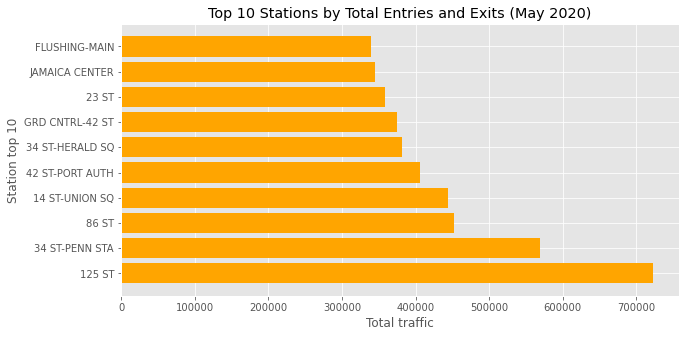

In [25]:
# The busiest 10 stations
# We define busy-ness as the sum of entries and exits for each time interval (total traffic = entries + exits).
# The 10 stations shown in the below graph typically have multiple subway lines.
Station_top_10 =df_May_2020_busiest.groupby(['STATION']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).head(10)
Station_top_10 = Station_top_10.reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
y_pos = Station_top_10['STATION']
x_pos = Station_top_10['busy']
ax.barh(y_pos, x_pos, align='center',color='orange', ecolor='black')
ax.set(title='Top 10 Stations by Total Entries and Exits (May 2020)', xlabel='Total traffic', ylabel='Station top 10')
ax.figure.savefig("StationTop_10.jpeg")



In [36]:
Station_top_10.head(10)

,STATION,busy
0,125 ST,721744.0
1,34 ST-PENN STA,569454.0
2,86 ST,452502.0
3,14 ST-UNION SQ,444428.0
4,42 ST-PORT AUTH,405487.0
5,34 ST-HERALD SQ,381192.0
6,GRD CNTRL-42 ST,375140.0
7,23 ST,358499.0
8,JAMAICA CENTER,345420.0
9,FLUSHING-MAIN,338783.0


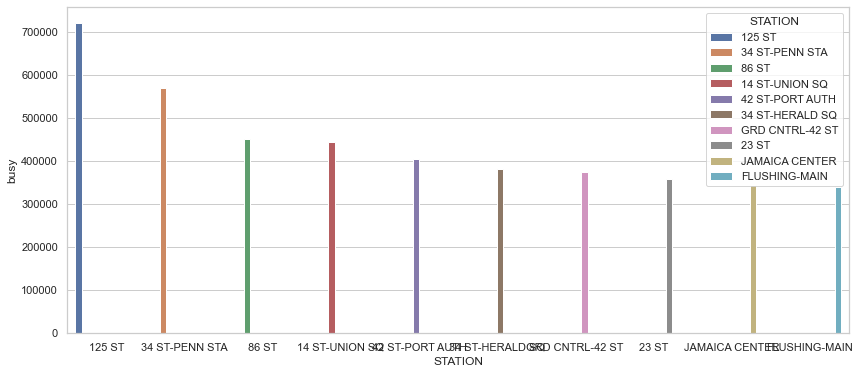

In [37]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x = 'STATION', y='busy', hue='STATION', data=Station_top_10)


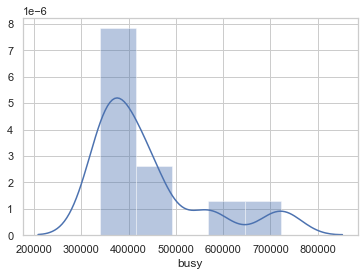

In [38]:
sns.distplot( Station_top_10['busy'], bins=5);

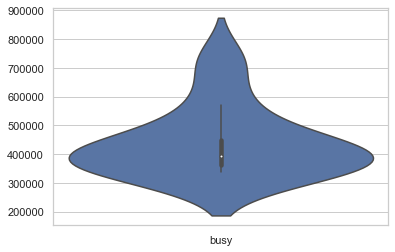

In [39]:
sns.violinplot(data=Station_top_10);

In [40]:
# Mean and quantiles of daily traffic by month
# While the mean daily traffic has been growing, the median is much higher 

Station_penn = df_May_2020_busiest[df_May_2020_busiest['STATION'] == '34 ST-PENN STA'].groupby(by = 'DATE').agg({'busy' : sum}).reset_index()
Station_penn['DATE'] = pd.to_datetime(Station_penn['DATE'])
Station_penn['month'] = Station_penn['DATE'].dt.month
penn_month = Station_penn[['month', 'busy']].groupby('month')
penn_mean = penn_month.mean()

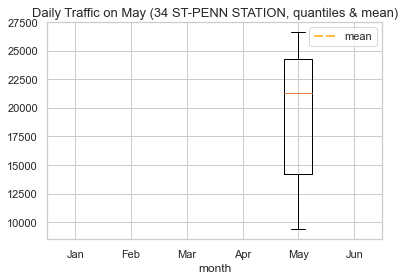

In [41]:
Station_penn['month']=Station_penn['month'].apply(str)
p1 = penn_mean.plot(kind='line', color = 'orange', dashes = (6, 2)) 
p1.legend(['mean'])
plt.boxplot([Station_penn[Station_penn['month'] == '1']['busy'].values,Station_penn[Station_penn['month'] == '2']['busy'].values,
             Station_penn[Station_penn['month'] == '3']['busy'].values,Station_penn[Station_penn['month'] == '4']['busy'].values,
             Station_penn[Station_penn['month'] == '5']['busy'].values,Station_penn[Station_penn['month'] == '6']['busy'].values])
plt.xticks((1,2,3,4,5,6),('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'))
plt.title('Daily Traffic on May (34 ST-PENN STATION, quantiles & mean)', size = 13)
plt.show()

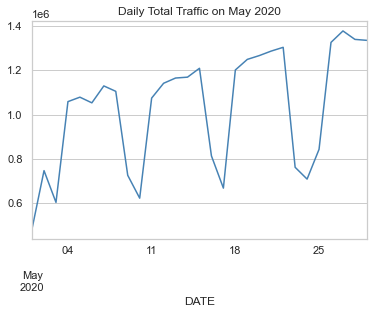

<Figure size 432x288 with 0 Axes>

In [42]:
Station_busy = df_May_2020_busiest[['DATE', 'busy']].groupby(['DATE']).sum().reset_index()
Station_busy['DATE'] = pd.to_datetime(Station_busy['DATE'])
Station_busy.set_index('DATE')['busy'].plot(color = 'steelblue')
plt.title('Daily Total Traffic on May 2020') 
plt.show()
plt.savefig('DailyTraffic.png', dpi=300, bbox_inches='tight')

In [43]:
Station_top_10.head(10)

,STATION,busy
0,125 ST,721744.0
1,34 ST-PENN STA,569454.0
2,86 ST,452502.0
3,14 ST-UNION SQ,444428.0
4,42 ST-PORT AUTH,405487.0
5,34 ST-HERALD SQ,381192.0
6,GRD CNTRL-42 ST,375140.0
7,23 ST,358499.0
8,JAMAICA CENTER,345420.0
9,FLUSHING-MAIN,338783.0


In [44]:
# I can't find Newyork station - region dataset, so added the regions of the stations manually
Station_top_10['area'] =['Manhattan','Manhattan','Manhattan',
                        'Brooklyn','Manhattan','Manhattan','Manhattan','Manhattan','Queens','Queens']

In [45]:
Station_top_10.head(10)

,STATION,busy,area
0,125 ST,721744.0,Manhattan
1,34 ST-PENN STA,569454.0,Manhattan
2,86 ST,452502.0,Manhattan
3,14 ST-UNION SQ,444428.0,Brooklyn
4,42 ST-PORT AUTH,405487.0,Manhattan
5,34 ST-HERALD SQ,381192.0,Manhattan
6,GRD CNTRL-42 ST,375140.0,Manhattan
7,23 ST,358499.0,Manhattan
8,JAMAICA CENTER,345420.0,Queens
9,FLUSHING-MAIN,338783.0,Queens


In [46]:
Area_top =Station_top_10.groupby('area').busy.sum().reset_index()

In [47]:
Area_top.head(10)

,area,busy
0,Brooklyn,444428.0
1,Manhattan,3264018.0
2,Queens,684203.0


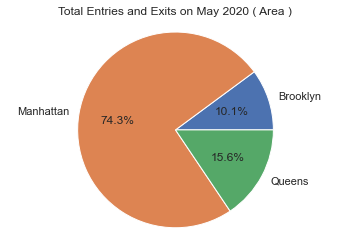

In [48]:
labels = Area_top['area']
sizes = Area_top['busy']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal',colors=['brown','red'])  
ax.set_title('Total Entries and Exits on May 2020 ( Area )')

plt.show()

In [49]:
# restaurant information in newyork
Newyork_Restaurants = pd.read_csv('D:\Data Scients Kursu\Projeler\MTA\DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [50]:
Newyork_Restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399913 entries, 0 to 399912
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  399913 non-null  object 
 1   DBA                    209927 non-null  object 
 2   BORO                   210286 non-null  object 
 3   BUILDING               207860 non-null  object 
 4   STREET                 207808 non-null  object 
 5   ZIPCODE                210076 non-null  object 
 6   PHONE                  210143 non-null  object 
 7   CUISINE DESCRIPTION    203464 non-null  object 
 8   INSPECTION DATE        203340 non-null  object 
 9   ACTION                 201778 non-null  object 
 10  VIOLATION CODE         196858 non-null  object 
 11  VIOLATION DESCRIPTION  196419 non-null  object 
 12  CRITICAL FLAG          202901 non-null  object 
 13  SCORE                  194166 non-null  float64
 14  GRADE                  91524 non-nul

In [51]:
# Rename Booth column to C/A 
Newyork_Restaurants.rename(columns = {'CUISINE DESCRIPTION':'NATIONAL'}, inplace = True)

In [52]:
Newyork_Restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,NATIONAL,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE;;;
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection;;;
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspect...
2,"50046354,VITE BAR,QUEENS,2507,BROADWAY,11106,3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection;;;
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection;;;


In [53]:
Newyork_Restaurants.isna().head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,NATIONAL,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE;;;
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
2,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [54]:
Newyork_Restaurants.isna().sum()

CAMIS                         0
DBA                      189986
BORO                     189627
BUILDING                 192053
STREET                   192105
ZIPCODE                  189837
PHONE                    189770
NATIONAL                 196449
INSPECTION DATE          196573
ACTION                   198135
VIOLATION CODE           203055
VIOLATION DESCRIPTION    203494
CRITICAL FLAG            197012
SCORE                    205747
GRADE                    308389
GRADE DATE               309690
RECORD DATE              197012
INSPECTION TYPE;;;       197012
dtype: int64

In [55]:
## Select only Station and Booth Column
Newyork_Restaurants = Newyork_Restaurants[['NATIONAL','BORO']]

In [56]:
Newyork_Restaurants.head(5)

,NATIONAL,BORO
0,Italian,MANHATTAN
1,Italian,MANHATTAN
2,NaN,NaN
3,Chinese,STATEN ISLAND
4,American,BROOKLYN


In [65]:
Turkish_restaurant= Newyork_Restaurants[Newyork_Restaurants.NATIONAL == 'Turkish'].groupby(['BORO'], as_index=False).count()


In [66]:
Turkish_restaurant.rename(columns = {'BORO':'AREA'}, inplace = True)
Turkish_restaurant.rename(columns = {'NATIONAL':'RESTAURANT'}, inplace = True)

In [67]:
Turkish_restaurant.head(10)

,AREA,RESTAURANT
0,BROOKLYN,232
1,MANHATTAN,375
2,QUEENS,70
3,STATEN ISLAND,23


In [68]:
Turkish_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AREA        4 non-null      object
 1   RESTAURANT  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes


In [69]:
Turkish_restaurant['RESTAURANT'].sum()

700

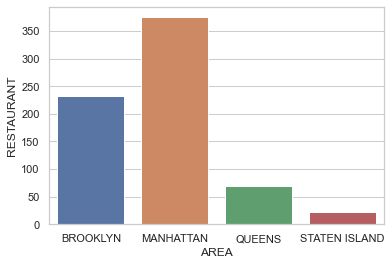

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x="AREA", y="RESTAURANT", data=Turkish_restaurant )


In [71]:
plt.savefig('NewyorkRestaurant-1.jpeg', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

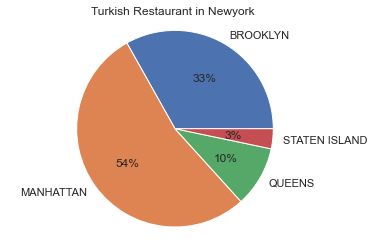

In [72]:
labels = Turkish_restaurant['AREA'] 
sizes = Turkish_restaurant['RESTAURANT'] 

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%')
ax.axis('equal') 
ax.set_title('Turkish Restaurant in Newyork ')

plt.show()

In [73]:
plt.savefig('NewyorkRestaurant-2.jpeg', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2fc0855df88>,
 [Text(0.5556906722114926, 0.949319691577679, 'BROOKLYN'),
  Text(-0.8928115832105988, -0.6425632084744536, 'MANHATTAN'),
  Text(0.9542691704828499, -0.5471474666540767, 'QUEENS'),
  Text(1.094144851260624, -0.11334480340918696, 'STATEN ISLAND')],
 [Text(0.3031040030244505, 0.5178107408605521, '33%'),
  Text(-0.48698813629669024, -0.3504890228042474, '54%'),
  Text(0.5205104566270089, -0.2984440727204054, '10%'),
  Text(0.5968062825057948, -0.061824438223192876, '3%')])

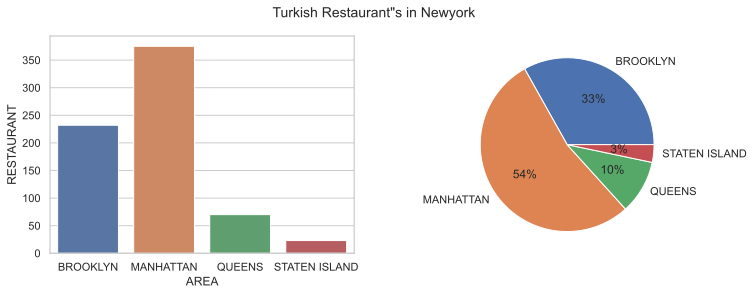

In [85]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


x = Turkish_restaurant['AREA'] 
y = Turkish_restaurant['RESTAURANT']  

plt.figure(figsize=[12,4])

plt.suptitle('Turkish Restaurant"s in Newyork',fontsize = 14)

plt.subplot(1,2,1) 
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x="AREA", y="RESTAURANT", data=Turkish_restaurant )

plt.subplot(1,2,2)
plt.pie(y, labels=x, autopct='%1.0f%%')


In [86]:
plt.savefig('NewyorkRestaurant-35.jpeg', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>